In [1]:
using LinearAlgebra 
using Kronecker
using Plots
using Random, Distributions

Attempting to Create a Time Crystal

In [2]:
X = [0 1 ; 1 0 ];
Y = [0 -1im ; im 0 ];
Z = [1 0 ; 0 -1 ];


H=1/sqrt(2)*[1 1 ; 1 -1];

S=[1 0; 0 im];
T=[1 0; 0 exp(im*pi/4)];



function RX(r)
    exp(-im*r/2*X)
end

function RY(r)
    exp(-im*r/2*Y)
end

function RZ(r)
    exp(-im*r/2*Z)
end


CNOT=[1 0 0 0; 0 1 0 0; 0 0 0 1; 0 0 1 0];
REVCNOT=kronecker(H, H)*CNOT*kronecker(H, H);


In [3]:
#The Random Field (Note the required Nesting):


RU=fill(fill(0.1+im, 2,2), 12); #Random Unitary

RH1=fill(fill(0.1+im, 2,2), 12); #NOTE: These two are Random Hermitian at this stage


RU1=fill(fill(0.1+im, 2,2), 12); #NOTE: These will be generated later from above



#Generating a GUE:

l = Normal(0, 0.50);   #off diagonal elements
d = Normal(0, 1.00);   #diagonal elements


for j in 1:length(RU)
    
    
    A=rand(l,2,2)+im*rand(l,2,2);
    for i in 1:dim(A)
        A[i,i]=rand(d)+im*rand(d);
    end
    
#Symmetrisation and Exponentiation:
    
    A=(A+A')/2;
    Unew=exp(im*A);
    
    RU[j]=Unew;
end





#Generating the set of controlabe Hermitian:

l = Normal(0, 0.50);   #off diagonal elements
d = Normal(0, 1.00);   #diagonal elements


for j in 1:length(RU)
    
    
    A=rand(l,2,2)+im*rand(l,2,2);
    for i in 1:dim(A)
        A[i,i]=rand(d)+im*rand(d);
    end
    
#Symmetrisation:
    
    RH1[j]=(A+A')/2;
end




In [27]:
o=pi/2;
XRow=copy(kronecker(RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o)));
ZRow=copy(kronecker(RU[1],RU[2],RU[3],RU[4],RU[5],RU[6],RU[7],RU[8],RU[9],RU[10],RU[11],RU[12]));

In [41]:
 
FU=fill(fill(0.1+im, 4,4), 6);
ordpar=fill(0.1,1);

#Looping:

#for al in 1:length(ordpar)
    
#    alpha=0.02*(al-1);
    alpha=0.11;

    for j in 1:length(RU)
        RU1[j]=exp(im*alpha*RH1[j]);
    end
       
    
    for j in 1:length(FU)
        FU[j]=CNOT*kronecker(RU1[j],RU1[j+6])*CNOT;
    end
    
    
    
    UOdd=copy(kronecker(FU[1],FU[2],FU[3],FU[4],FU[5],FU[6]));
    UEven=copy(kronecker(I(2),FU[2],FU[3],FU[4],FU[5],FU[6],I(2)));

    A=XRow*UEven*UOdd*ZRow
    
   
    
    EigA=eigvals(A);
    N=fill(0.1,length(EigA))


        for i in 1:length(EigA)
            N[i]=real(log(EigA[i])/(-im));
        end

    N= sort(N,rev=true);
    EigA1=copy(N);
    ls = deleteat!(EigA1,1);
    la = deleteat!(N,length(N));
    m=copy(la-ls)/mean(la-ls)
    
    
    
    
    n=fill(0.1,length(EigA)-2);

        for i in 1:length(n)
            #n[i]=m[i+1]/m[i];
            n[i]= minimum([m[i], m[i+1]])/maximum([m[i], m[i+1]]);
        end

#    ordpar[al]=mean(n);
#end
    
    
    
    

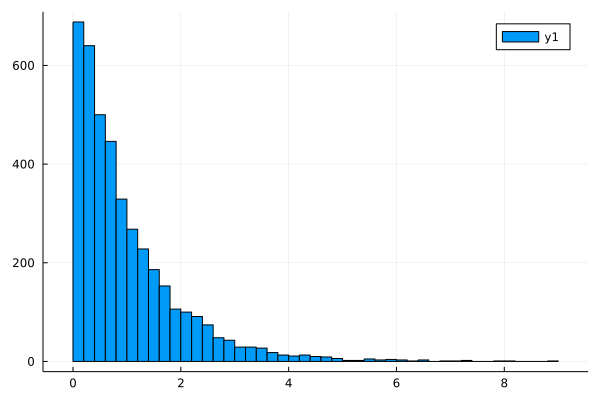

In [42]:
histogram(m)

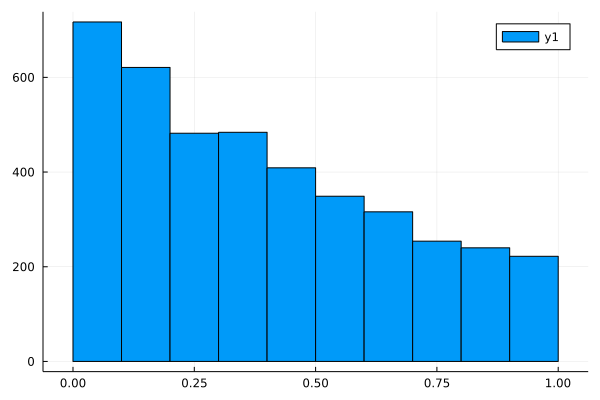

In [43]:
histogram(n)

In [44]:
mean(n)

0.39099998791993995

In [47]:
gr()
histogram(n)
savefig("fig/DTC_r")

# The Autocorrelator?

Position of Neel state:

In [77]:
Int(0b010101010101)

1365

constructing the Z insertion operators:

In [79]:
 
Zi=fill(fill(0.1+im, 4096,4096), 12);

In [82]:
Zi[1]=copy(kronecker(Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[2]=copy(kronecker(I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[3]=copy(kronecker(I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[4]=copy(kronecker(I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[5]=copy(kronecker(I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[6]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[7]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2)));
Zi[8]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2)));
Zi[9]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2)));
Zi[10]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2)));
Zi[11]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2)));
Zi[12]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z));

computing the autocorrelator:

In [100]:
Cii=fill(0.1, 12,25)

12×25 Matrix{Float64}:
 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  …  0.1  0.1  0.1  0.1  0.1  0.1  0.1
 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1     0.1  0.1  0.1  0.1  0.1  0.1  0.1
 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1     0.1  0.1  0.1  0.1  0.1  0.1  0.1
 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1     0.1  0.1  0.1  0.1  0.1  0.1  0.1
 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1     0.1  0.1  0.1  0.1  0.1  0.1  0.1
 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  …  0.1  0.1  0.1  0.1  0.1  0.1  0.1
 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1     0.1  0.1  0.1  0.1  0.1  0.1  0.1
 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1     0.1  0.1  0.1  0.1  0.1  0.1  0.1
 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1     0.1  0.1  0.1  0.1  0.1  0.1  0.1
 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1     0.1  0.1  0.1  0.1  0.1  0.1  0.1
 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  …  0.1  0.1  0.1  0.1  0.1  0.1  0.1
 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1     0.1  0.1  0.1  0.1  0.1  0.1  0.1

In [84]:
for l in 1:12
    for t in 1:25
        At=U
    Cii[l,t]= 

LoadError: syntax: incomplete: premature end of input

In [112]:
At=I(4096);
for t in 1:25
    for l in 1:12
        LM=copy(Zi[l]*Zi[l]*At);
        Cii[l,t]=abs(LM[1,1]);
    end
    At=A*At;
end

In [ ]:
C=fill(0.1,25);
for t in 1:25
    C[t]=

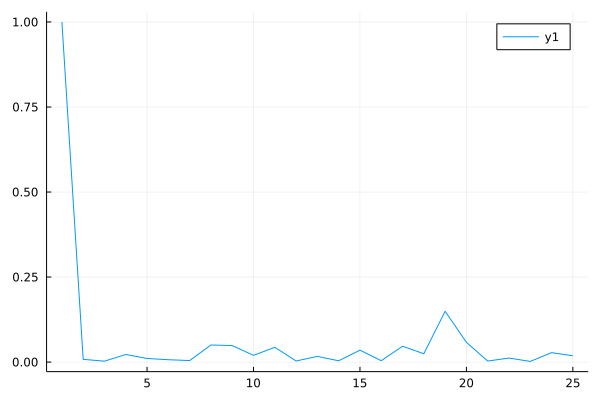

In [115]:
xax=1:25
plot(xax,Cii[2,:])

In [116]:
C=fill(0.1, 25)

25-element Vector{Float64}:
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1

In [117]:
for i in 1:25
    Cimp=copy(Cii[:,i]);
    C[i]=mean(Cimp);
end

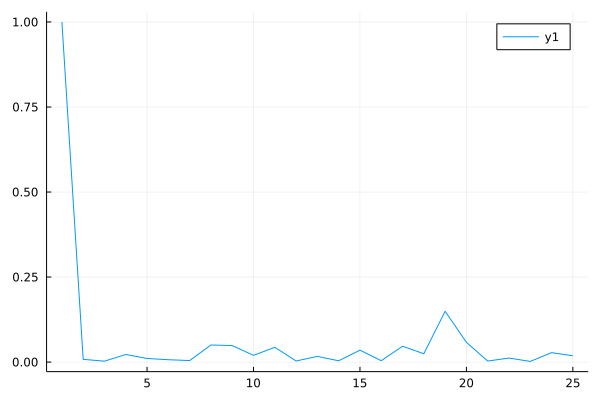

In [118]:
xax=1:25
plot(xax,C)